In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn import datasets

iris = datasets.load_iris()

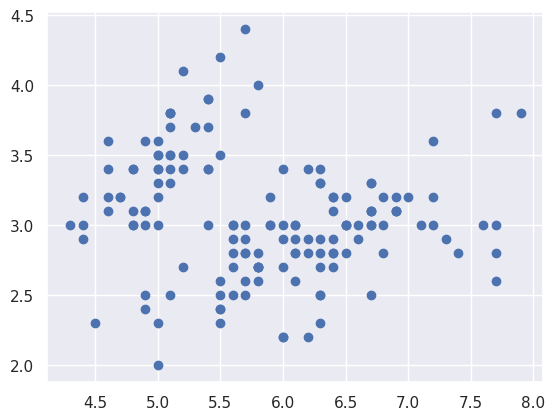

In [22]:
plt.scatter(iris.data[:, 0], iris.data[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


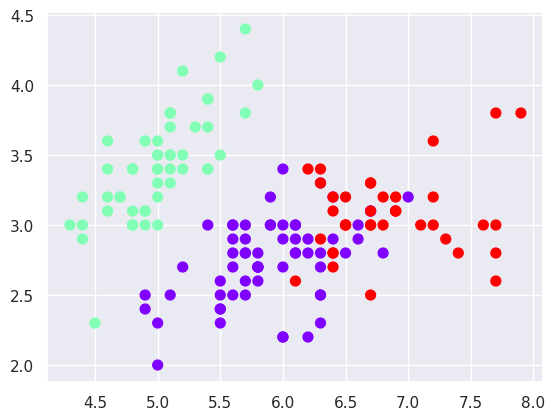

In [38]:
from sklearn.cluster import KMeans
est = KMeans(3)  # 4 clusters
est.fit(iris.data)
y_kmeans = est.predict(iris.data)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=y_kmeans, s=50, cmap='rainbow');

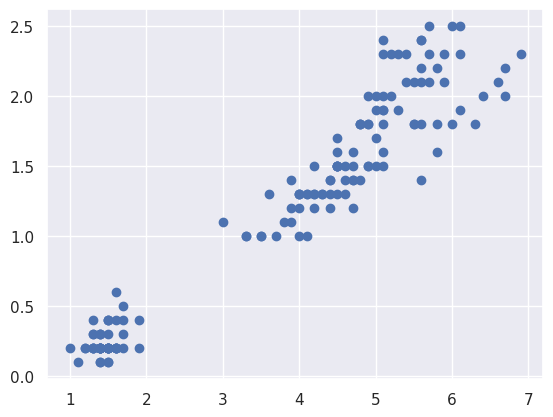

In [23]:
plt.scatter(iris.data[:, 2], iris.data[:, 3])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


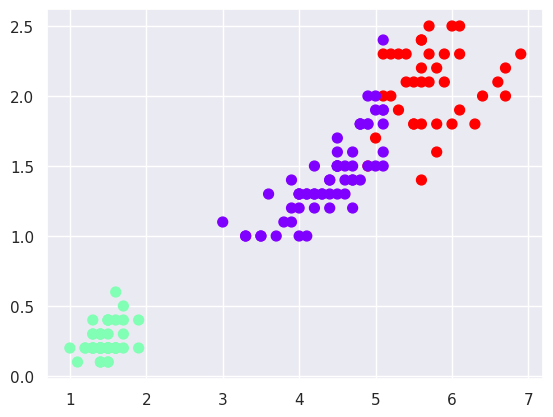

In [37]:
from sklearn.cluster import KMeans
est = KMeans(3)  # 4 clusters
est.fit(iris.data)
y_kmeans = est.predict(iris.data)
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=y_kmeans, s=50, cmap='rainbow');